In [ ]:

var('x','y','t')
f = function('f')(x,y,t)
pde = diff(f(x,y,t),x,2) + diff(f(x,y,t), y, 2)


diff(f(y, t, x), y, y) + diff(f(y, t, x), x, x)

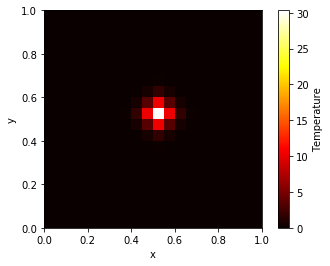

In [ ]:
#some code chatgpt spat out for a numerical method to solve the equation for heat transfer in xy plane
import numpy as np
import matplotlib.pyplot as plt

# Define grid parameters
L = 1.0       # Length of the spatial domain (x and y)
Nx = 20       # Number of spatial points in x
Ny = 20       # Number of spatial points in y
dx = L / (Nx - 1)  # Spatial step in x
dy = L / (Ny - 1)  # Spatial step in y

T = 0.1       # Total time to simulate
Nt = 500      # Number of time steps
dt = T / Nt   # Time step size
alpha = 0.01  # Thermal diffusivity

# Stability condition: ensure dt <= dx^2 / (4*alpha)
assert dt <= dx**2 / (4*alpha), "Time step too large! Reduce dt for stability."

# Initialize solution array
u = np.zeros((Nx, Ny))  # Initial temperature distribution

# Set an initial condition: a hot spot in the center
u[Nx//2, Ny//2] = 100.0

# Define function to update temperature
def update_temperature(u, alpha, dx, dy, dt):
    u_new = u.copy()
    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
            u_new[i, j] = u[i, j] + alpha * dt * (
                (u[i+1, j] - 2*u[i, j] + u[i-1, j]) / dx**2 +
                (u[i, j+1] - 2*u[i, j] + u[i, j-1]) / dy**2
            )
    return u_new

# Run the simulation
for _ in range(Nt):
    u = update_temperature(u, alpha, dx, dy, dt)

# Plot the final temperature distribution
plt.imshow(u, cmap='hot', origin='lower', extent=[0, L, 0, L])
plt.colorbar(label="Temperature")
#plt.title("Heat Distribution After {:.2f} Seconds".format(T))
plt.xlabel("x")
plt.ylabel("y")
plt.show()


In [21]:
#for f(x,y) = 6*x^2*y^2 + 2*x^2 + 6*y^2 find the descriminant of f
f(x,y) = 6*x^2*y^2 + 2*x^2 + 6*y^2
def descriminant(f):
    return diff(f(x,y),x,2)*diff(f(x,y),y,2) - diff(f(x,y),x,y)^2
f(x,y) = e^(-1*x^2 - 4*y^2 + 2*x + 6*y)
descriminant(f)

-16*(x - 1)^2*(4*y - 3)^2*e^(-2*x^2 - 8*y^2 + 4*x + 12*y) + 8*(2*(x - 1)^2*e^(-x^2 - 4*y^2 + 2*x + 6*y) - e^(-x^2 - 4*y^2 + 2*x + 6*y))*((4*y - 3)^2*e^(-x^2 - 4*y^2 + 2*x + 6*y) - 2*e^(-x^2 - 4*y^2 + 2*x + 6*y))

In [53]:
# finding critical points
f(x,y) = (x^2 - 5*x)(y^2 - 2*y)

print(solve(diff(f(x,y),x) == 0,x))
print(solve(diff(f(x,y),y) == 0,x))
print(solve(-4*y - 6 == -1/6*y - 1/6,y))

g(y) = -4*y - 6
print([g(i) for i in [-35/23,0]])
print([f(-2250, -150), f(0,0),])

[x == r1]
[

]
[
y == (-35/23)
]
[2/23, -6]
[519726000, 0]


In [4]:
def analyze_critical_points(f, vars):
    """
    Finds and classifies critical points of f(x), f(x,y), or f(x,y,z).
    
    Parameters:
        f    : A symbolic function in SageMath.
        vars : A list of variables (e.g., [x], [x,y], or [x,y,z]).
    
    Returns:
        A dictionary of critical points with their classifications.
    """
    #from sympy import Matrix

    num_vars = len(vars)
    
    # Compute first-order partial derivatives (gradient)
    grad = [diff(f, var) for var in vars]
    
    # Solve for critical points
    crit_solutions = solve(grad, vars, solution_dict=True)
    
    if not crit_solutions:
        print("No critical points found.")
        return {}

    critical_points = []
    classifications = {}

    for sol in crit_solutions:
        try:
            point = tuple(sol[var] for var in vars)  # Ensure we get a full (x,y) or (x,y,z) point
        except KeyError:
            print(f"Skipping incomplete solution: {sol}")
            continue

        critical_points.append(point)

        if num_vars == 2:
            # Compute second-order partial derivatives
            f_xx = diff(grad[0], vars[0])
            f_yy = diff(grad[1], vars[1])
            f_xy = diff(grad[0], vars[1])

            # Compute Hessian determinant (Discriminant)
            D = f_xx * f_yy - f_xy**2

            # Evaluate at the critical point
            D_val = D.subs(sol)
            f_xx_val = f_xx.subs(sol)

            if D_val > 0:
                if f_xx_val > 0:
                    classifications[point] = "Local Minimum"
                elif f_xx_val < 0:
                    classifications[point] = "Local Maximum"
            elif D_val < 0:
                classifications[point] = "Saddle Point"
            else:
                classifications[point] = "Inconclusive (Hessian determinant = 0)"

    return classifications


In [ ]:
f(x,y) = x^2 + y^2
print(analyze_critical_points(f,[x, y]))
#f(-1/6*sqrt(6), -1/6*sqrt(6))
g(x,y) = 3*x +7*y - 7
solve(f(x,y) == g(x,y),x)
h(x) = 1/2*sqrt(-4*y^2 + 28*y - 19) + 3/2

#analyze_critical_points(h,[x,y])

SyntaxError: invalid syntax (<ipython-input-6-cfc8b6436e96>, line 8)